In [1]:
#Mount Google Drive for Data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [27]:
#Standard Python Library

import pandas as pd
import numpy as np
import seaborn as sns
import json
import os

#Standar NLP Pre-Processing Library

import nltk as nlp
from nltk.corpus import stopwords
import string
import re
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB,BernoulliNB,MultinomialNB,MultinomialNB
from tensorflow.keras.utils import plot_model 

#SK Learn and TF library for NLP NueralNet Layers
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer
from sklearn.gaussian_process import GaussianProcessClassifier
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

#Logistic Regression Library
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

#Naive Bayes Library
from sklearn.naive_bayes import GaussianNB

#KNN Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix


#LSTM Libraries
from tensorflow.keras.layers import BatchNormalization, LSTM, GRU, Input, SpatialDropout1D
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import optimizers
import tensorflow.keras.backend as backend
from nltk import word_tokenize, KneserNeyProbDist, SimpleGoodTuringProbDist, FreqDist, trigrams

#Import Ploting Library
import matplotlib.pyplot as plt

In [3]:
"""
READS Text File and return all of body as a string
"""
def read_input(input_path:str) -> str:
    file_data = open(input_path , 'r')
    
    return file_data.read()

"""
READS Directory Text File and return list of each text file
"""
def read_directory(input_dir:str):
  data = []
  files = [f for f in os.listdir(input_dir)] #if os.path.isfile(f)]
  for f in files:
    f_path = os.path.join(input_dir, f)
    with open (f_path, "r") as myfile:
      data.append(myfile.read())
  return data

#The Four Group of Data
train_pos = read_directory('/content/drive/MyDrive/aclImdb/train/pos')
train_neg = read_directory('/content/drive/MyDrive/aclImdb/train/neg')
test_pos = read_directory('/content/drive/MyDrive/aclImdb/test/pos')
test_neg = read_directory('/content/drive/MyDrive/aclImdb/test/pos')

In [4]:
"""
Text pre-processing function
"""
def preprocess(paragraph, label, sample_size):
 
    data_set = [paragraph.strip() for paragraph in paragraphs if len(paragraph) > sample_size]
    data = [re.sub('[\W_]+', ' ', sample.lower().strip()) for sample in data_set]
    size = len(data)

    label_array = np.ones((size,)) * label
    df = pd.DataFrame({'paragraph': data, 'category':label_array })
    print('The total number of examples for category ' + str(label)+ ' is: ' + str(size))
    return df, size


In [5]:
X = pd.concat([pd.DataFrame(np.array(train_pos)),pd.DataFrame(np.array(train_neg))])
X.shape
X2 = pd.concat([pd.DataFrame(np.array(test_pos)),pd.DataFrame(np.array(test_neg))])
X2.shape

(25000, 1)

In [6]:
df = pd.DataFrame(np.ones((len(train_pos),1)))
df2 = pd.DataFrame(np.zeros((len(train_neg),1)))
Y = pd.concat([df,df2])
Y.shape

df = pd.DataFrame(np.ones((len(test_pos),1)))
df2 = pd.DataFrame(np.zeros((len(test_neg),1)))
Y2 = pd.concat([df,df2])
Y2.shape

(25000, 1)

In [7]:
vocab = read_input('/content/drive/MyDrive/aclImdb/imdb.vocab').split('\n')
vocab_size = len(vocab) + 1

In [49]:
tokenizer = Tokenizer(num_words=200)
tokenizer.fit_on_texts(X[0])

X_train = tokenizer.texts_to_sequences(X[0])
X_test = tokenizer.texts_to_sequences(X2[0])

maxlen = 150

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

label_train = to_categorical(Y)
label_test = to_categorical(Y2)


In [50]:
inputs = Input(shape=(maxlen,))
lstm_model = Sequential()
lstm_model.add(Embedding(vocab_size, 100))
lstm_model.add(Dense(8, activation='relu'))
lstm_model.add(LSTM(100))
lstm_model.add(Dense(2, activation='softmax'))
lstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(lstm_model.summary())

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_12 (Embedding)    (None, None, 100)         8952800   
                                                                 
 dense_13 (Dense)            (None, None, 8)           808       
                                                                 
 lstm_11 (LSTM)              (None, 100)               43600     
                                                                 
 dense_14 (Dense)            (None, 2)                 202       
                                                                 
Total params: 8,997,410
Trainable params: 8,997,410
Non-trainable params: 0
_________________________________________________________________
None


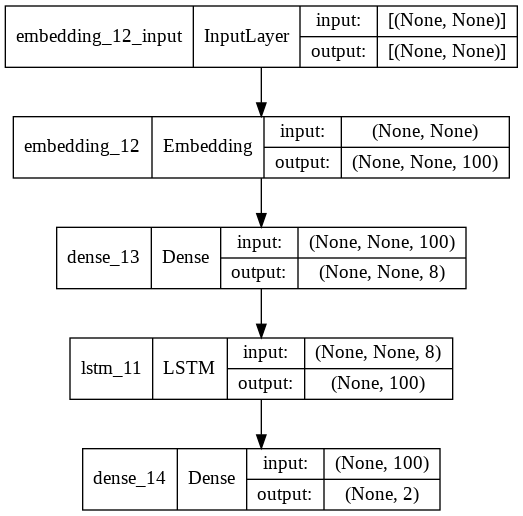

In [51]:
plot_model(lstm_model, show_shapes=True, to_file='lstm_model.png')

In [52]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model.summary())

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_13 (Embedding)    (None, None, 100)         8952800   
                                                                 
 spatial_dropout1d_8 (Spatia  (None, None, 100)        0         
 lDropout1D)                                                     
                                                                 
 lstm_12 (LSTM)              (None, 50)                30200     
                                                                 
 dense_15 (Dense)            (None, 2)                 102       
                                                                 
Total params: 8,983,102
Trainable params: 8,983,102
Non-trainable params: 0
_________________________________________________________________
None


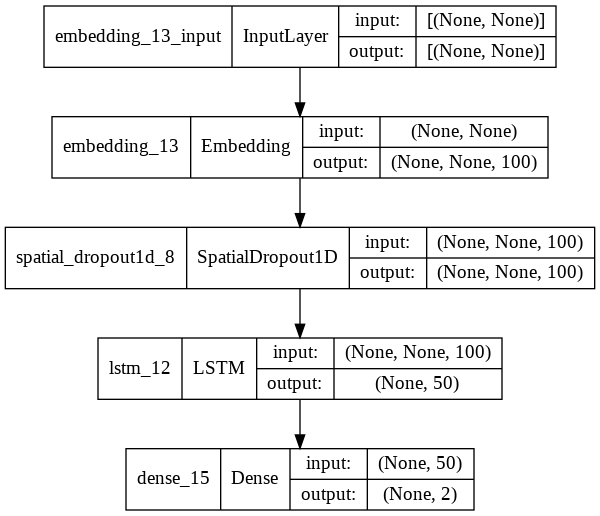

In [53]:
plot_model(model, show_shapes=True, to_file='model.png')

In [54]:
epochs = 10
batch_size = 128

In [ ]:
history = model.fit(X_train, label_train, epochs=epochs, batch_size=batch_size)

Epoch 1/10
196/196 [==============================] - 91s 448ms/step - loss: 0.6539 - accuracy: 0.6059
Epoch 2/10
196/196 [==============================] - 88s 447ms/step - loss: 0.5813 - accuracy: 0.7232
Epoch 3/10
196/196 [==============================] - 88s 447ms/step - loss: 0.6051 - accuracy: 0.6881
Epoch 4/10
196/196 [==============================] - 88s 447ms/step - loss: 0.5637 - accuracy: 0.7344
Epoch 5/10
196/196 [==============================] - 88s 448ms/step - loss: 0.5507 - accuracy: 0.7433
Epoch 6/10
196/196 [==============================] - 88s 448ms/step - loss: 0.5202 - accuracy: 0.7545
Epoch 7/10
196/196 [==============================] - 88s 447ms/step - loss: 0.5082 - accuracy: 0.7594
Epoch 8/10
196/196 [==============================] - 88s 447ms/step - loss: 0.5010 - accuracy: 0.7628
Epoch 9/10
165/196 [========================>.....] - ETA: 13s - loss: 0.5062 - accuracy: 0.7627

In [ ]:
lstm_model.fit(X_train, label_train, epochs=epochs, batch_size=batch_size)

In [ ]:
lstm_loss = lstm_model.evaluate(X_test, label_test)
loss = lstm_loss[0]
l_acc_test = lstm_loss[1]
print('loss = ' + str(loss))
print('accuracy = ' + str(l_acc_test))

In [ ]:
model_loss = model.evaluate(X_test, label_test)
m_loss = model_loss[0]
acc_test = model_loss[1]
print('loss = ' + str(m_loss))
print('accuracy = ' + str(acc_test))